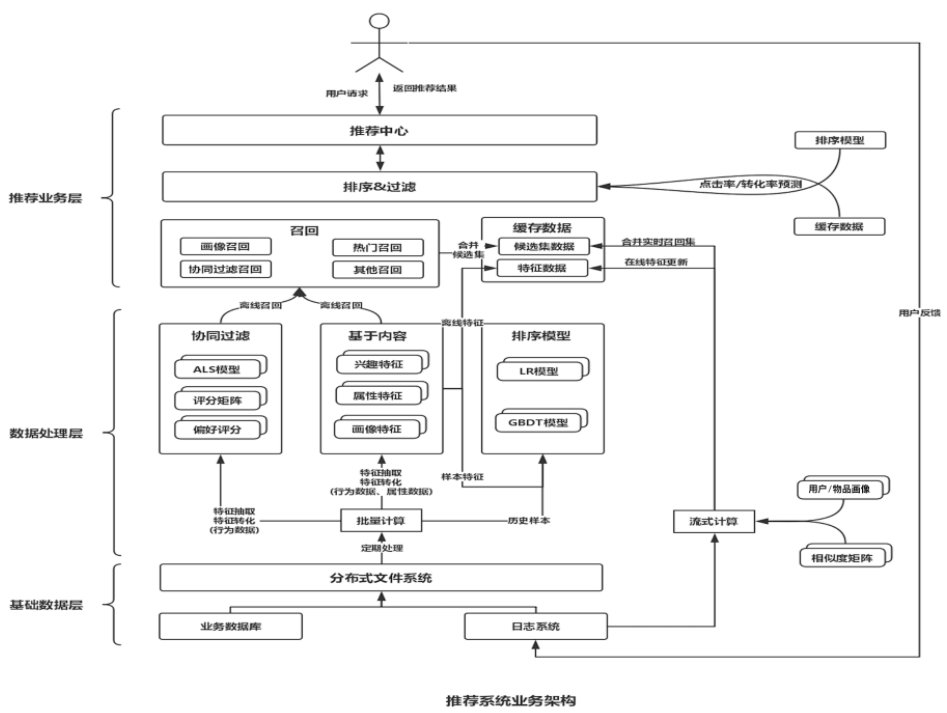

## 某商城推荐系统介绍

背景：网站新上线时的主要推荐业务流实现

#### 一、 基础数据层
    1. 元数据收集：
        - 业务DB：网站业务DB内相关数据
            - 以商城当前数据库中约33万商品数据为基础
        - 日志数据：埋点日志
            - 点击流日志
            - 曝光日志
            
    2. 推荐业务原始数据存储：HDFS
        - 业务DB ==> HDFS：sqoop
        - 日志数据 ==> HDFS/KAFKA：flume
    3. 元数据简单的预处理

#### 二、 数据处理层
    1. 离线计算：
        - 基于内容的物品相似度计算
        - 物品画像、用户画像
        - 行为偏好评分
        - 相关模型训练
    2. 在线计算：
        - 实时行为分析

#### 三、 推荐业务层
    1. 初期：
        - 冷启动
            - 根据商品详细属性等数据，离线计算出商品画像
            - 根据商品画像的部分属性求出的物品相似度进行推荐与排序(解决物品冷启动)
            - 以实时推荐为主(解决用户冷启动)：根据用户当日实时行为数据为用户建立推荐结果集
            - 以热门推荐、新品推荐等非个性化推荐(解决用户冷启动)
    2. 中后期：利用积累的大量用户行为数据，逐渐以离线推荐为主，实时推荐为辅
        - 离线召回
            - 根据用户点击流日志进行行为偏好评分预估，实现协同过滤推荐
            - 将用户点击流日志结合物品特征进行用户行为特征提取，刻画更加个性化的用户画像
        - 离线模型
            - 利用曝光日志信息结合用户画像和物品画像特征进行点击率/转化率/跳出率等模型训练，进行推荐排序
        - 实时推荐：
            - 同上

#### 实现流程

1. 业务数据处理

2. 日志数据处理

3. 画像建模

4. 推荐业务处理